<!-- # 1. **Importing Libraries** -->

In [197]:
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt

<!-- # 2. **Creating H1** -->

In [198]:
# Create the full matrix H by applying cyclic shifts to H1
def circulant_shift(matrix, shift):
    """Apply a right circulant shift to each row of the matrix."""
    shifted_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        shifted_matrix[i] = np.roll(matrix[i], shift)
    return shifted_matrix

n = 24
p = 8
k = 4
gamma = 2
rho = 6


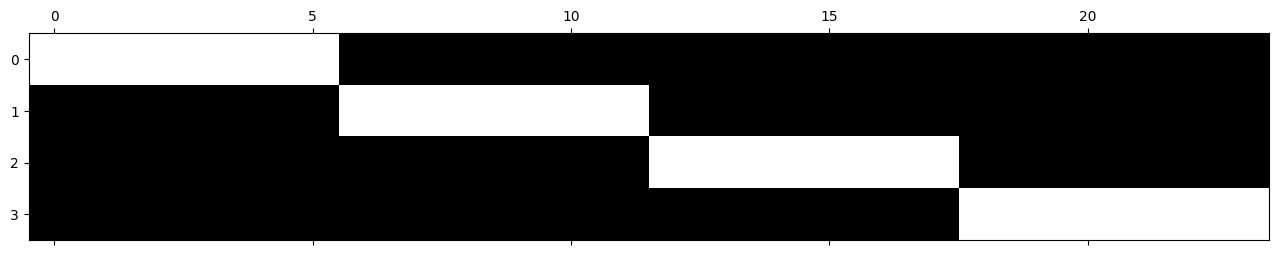

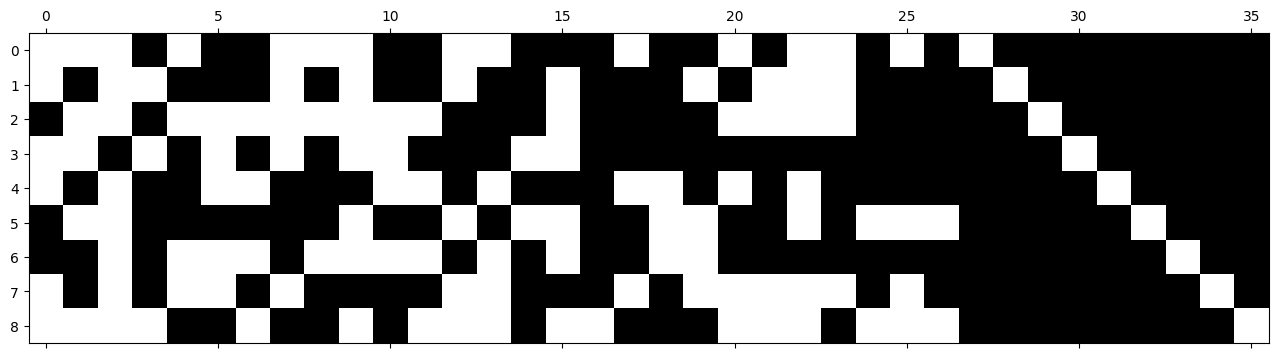

In [199]:
n = 24
p = 8

k = 4
gamma = int(p/k)
rho = int(n/k)

print(f"n = {n}")
print(f"p = {p}")
print(f"k = {k}")   
print(f"gamma = {gamma}")
print(f"rho = {rho}")

# Generate the matrix
H1 = np.zeros((k, n), dtype=int)

for i in range(k):
    H1[i, i*rho:(i+1)*rho] = 1

# Plot the matrix as heatmap
plt.matshow(H1, cmap='gray')
plt.show()

# Full H matrix initialized
H_full = np.zeros((k * gamma, n), dtype=int)

temp_H1 = H1.copy()

# Apply cyclic shifts to H1 to construct H_full
H_full[:k, :] = H1

for i in range(1, gamma):
    shift_value = 10  # You can adjust the shift pattern as needed
    H_full[i * k:(i + 1) * k, :] = circulant_shift(H1, shift_value)
    temp_H1 = circulant_shift(temp_H1, shift_value)

mat_path = "D:\Research\BTP\H_mat_9_36.mat"
import scipy.io
# Load the matrix from the .mat file
H_full = scipy.io.loadmat(mat_path)['H']
# import h5py
# with h5py.File(mat_path, 'r') as f:
#     H_full = f['H'][:]  # Reads the dataset 'H' into a NumPy array
#     H_full = H_full.T

# Plot the full matrix H as a heatmap
plt.matshow(H_full, cmap='gray')
plt.show()
   


In [200]:
print("Full H matrix:")
print(H_full)

# Save the matrix as .mat file
# import scipy.io
# scipy.io.savemat('H_matrix.mat', {'H': H_full})


Full H matrix:
[[1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0]
 [1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1]]


<!-- # 3. **Get the Generator Matrix** -->

In [201]:
def is_identity_matrix(matrix):
    """
    Check if the input matrix is an identity matrix.
    """
    rows, cols = matrix.shape
    if rows != cols:
        return False

    # Iterate over the diagonal elements
    for i in range(rows):
        if matrix[i, i] != 1:
            return False
        if sum(matrix[i, :]) != 1:
            return False
    return True

def systematic_form(H):
    """
    Convert the parity check matrix H to systematic form [P | I_p].
    This will ensure that the right part of H is an identity matrix.
    """
    # Perform row operations to convert the last p columns to an identity matrix
    rows, cols = H.shape
    p = rows
    n = cols
    k = n - p  # Number of information bits

    # Separate H into two parts: left P and right I_p (if H is already in systematic form)
    P = H[:, :k]
    I_p = H[:, k:]

    if not is_identity_matrix(I_p):
        # If I_p is not an identity matrix, apply Gaussian elimination to H
        H_sys = H.copy()
        for i in range(p):
            # Make sure we have 1 on the diagonal of I_p
            if H_sys[i, k + i] == 0:
                # Swap rows if the current diagonal element is 0
                for j in range(i + 1, p):
                    if H_sys[j, k + i] == 1:
                        H_sys[[i, j]] = H_sys[[j, i]]  # Swap rows
                        break
            # Eliminate other rows in the current column
            for j in range(p):
                if j != i and H_sys[j, k + i] == 1:
                    H_sys[j] = (H_sys[j] + H_sys[i]) % 2  # XOR operation (binary addition)

        P = H_sys[:, :k]
        I_p = H_sys[:, k:]

    return P, I_p

def generator_matrix(H):
    """
    Calculate the generator matrix G given the parity check matrix H.
    """
    p = H.shape[0]  # Number of parity bits
    n = H.shape[1]  # Total number of bits
    k = n - p       # Number of information bits

    # Get P and I_p from H
    P, I_p = systematic_form(H)

    print(P.shape, I_p.shape)
    
    # Initialize G as a boolean array to save memory
    G = np.zeros((k, k + P.shape[0]), dtype=bool)
    G[:, :k] = np.eye(k, dtype=bool)     # Set the identity matrix part
    G[:, k:] = P.T.astype(bool)          # Set the P.T part directly as boolean
    
    return G

(9, 27) (9, 9)


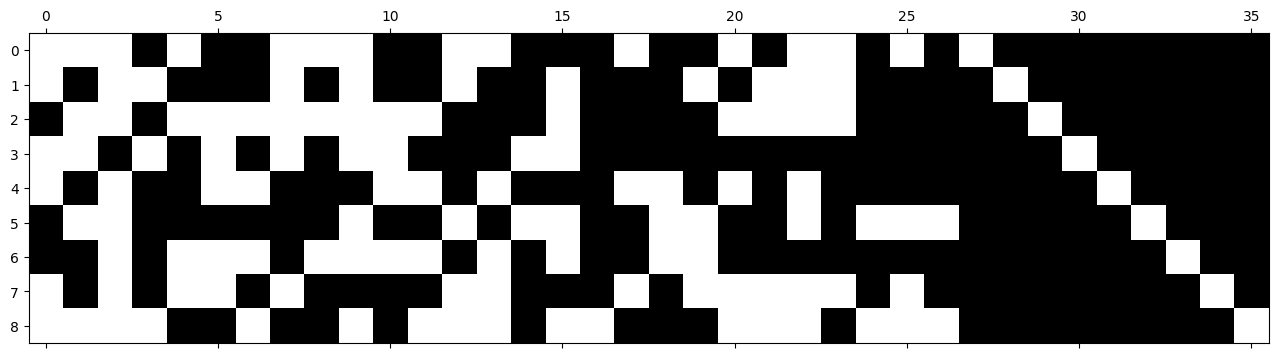

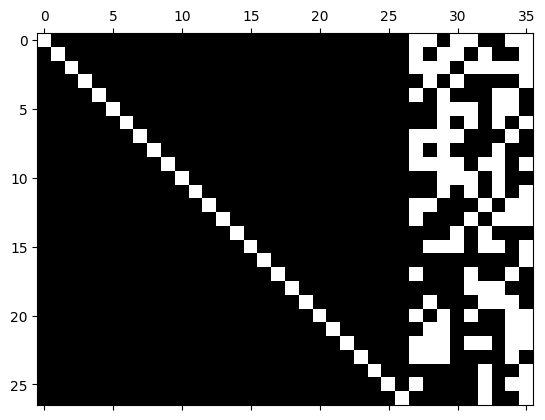

Generator matrix G:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1]
 [0 0

In [202]:
# Calculate the generator matrix G
G = generator_matrix(H_full).astype(int)

plt.matshow(H_full, cmap='gray')
plt.show()

# Plot the matrix as heatmap
plt.matshow(G, cmap='gray')
plt.show()

print("Generator matrix G:")
print(G)


In [203]:
import matplotlib.patches as mpatches

In [204]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Plotting function with fixed figure size
def plot_matrix(matrix, title=None, color_map='gray'):
    fig, ax = plt.subplots(figsize=(5, 5))  # Fixed size for consistent layout
    ax.matshow(matrix, cmap=color_map)
    ax.set_title(title, pad=20, fontsize=14, fontweight='bold')  # Title above matrix
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.set_aspect('equal')  # Ensures square cells for matrix elements

    # Remove spines for a clean, professional look
    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.set_xticks([])  # Hide x-ticks
    ax.set_yticks([])  # Hide y-ticks

    # Create legend with color blocks for 1 and 0, using facecolor and edgecolor
    white_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='1')
    black_patch = mpatches.Patch(facecolor='black', edgecolor='black', label='0')
    ax.legend(handles=[white_patch, black_patch], loc='upper right', 
              bbox_to_anchor=(1.2, 1), fontsize=10, frameon=False)

    # Save each figure with a consistent aspect ratio and size
    plt.tight_layout(pad=2)
    return fig

# Generate and save plots
fig_H = plot_matrix(H_full)
fig_H.savefig("H_matrix.png", dpi=300, bbox_inches='tight')

fig_G = plot_matrix(G)
fig_G.savefig("G_matrix.png", dpi=300, bbox_inches='tight')
plt.close('all')



In [205]:
# np.dot(G, H_full.T) % 2
np.dot(H_full, G.T) % 2

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]], dtype=int32)

In [206]:
# Write a File name "encoder.v"
def write_encoder_verilog(G, path):
    """
    Write the encoder module in Verilog HDL.
    """
    k, n = G.shape
    with open(path, 'w') as f:
        f.write('module encoder(frame_data, out);\n');
        f.write(f'    input [{k-1}:0] frame_data; // Frame bits\n');
        f.write(f'    output [{n-1}:0] out; // Output encoded bits with parity bits = {n}\n');
        f.write('\n\n')
        
        for i in range(k):
            f.write(f'    assign out[{i+n-k}] = frame_data[{i}];\n')

        f.write('\n\n')

        for i in range(k, n):
            temp_col = G[:, i]
            temp_str_col = ''

            for j in range(k):
                if temp_col[j] == 1:
                    temp_str_col += f'frame_data[{j}] ^ '
            
            temp_str_col = temp_str_col[:-3]
            f.write(f'    assign out[{i-k}] = {temp_str_col};\n')
        
        f.write('\n')
        
        f.write('endmodule\n')

write_encoder_verilog(G, 'encoder.v')

<!-- # 4. **Encoding** -->

In [207]:
G.shape

(27, 36)

In [208]:
# x = np.zeros((1,27), dtype=int)
# print("Transmitted message x:", "".join(x.flatten().astype(str)))
# x[0, 0] = 1
# x[0, 1] = 1

# # Calculate the codeword y
# y = x.dot(G) % 2
# print("Coded Message X:", "".join(y.flatten().astype(str)))


# # Introducing error
# y[0, 2] = 1
# y[0, 3] = 0
# y[0, 4] = 1
# print("Received message y:", "".join(y.flatten().astype(str)))



In [209]:
def ldpc_encode(x, H):
    """
    Encode the message x using the LDPC code defined by the parity check matrix H.
    """
    # Calculate the generator matrix G
    G = generator_matrix(H)

    # Encode the message x
    y = x.dot(G) % 2

    return y

<!-- # 5. **Decoding** -->

In [210]:

# # Initialize the variable to store the current estimate of the codeword
# x_hat = y.copy()

# # Perform bit-flipping decoding
# max_iterations = 100

# for iteration in range(max_iterations):
#     # Forward Pass
#     # Calculate the syndrome
#     s = np.dot(x_hat, H_full.T) % 2

#     print(f"Iteration {iteration+1}: Syndrome s = {s}")
    
#     # Check if the syndrome is all zeros
#     if np.all(s == 0):
#         print(f"Decoding successful after {iteration} iterations.")
#         break

#     else:
#         # # Search for the bit to flip in H matrix for syndrome s
#         # for i in range(H_full.shape[1]):
#         #     if np.array_equal(s.flatten(), H_full[:, i]):
#         #         # Flip the bit
#         #         x_hat[0, i] = (1 + x_hat[0, i]) % 2
#         #         break
#         num_flips = np.zeros(H_full.shape[1])

#         for i in range(len(s[0])):
#             if (s[0,i] == 1):
#                 num_flips = num_flips + H_full[i, :]
    
#         flip_index = np.argmax(num_flips)
#         if num_flips[flip_index] > 1:
#             x_hat[0, flip_index] = (1 + x_hat[0, flip_index]) % 2

# print("Decoded message x_hat:", "".join(x_hat.flatten().astype(str)))

In [211]:
def ldpc_decode(y, H, max_iterations=100):
    """
    Decode the received message y using the LDPC code defined by the parity check matrix H.
    """
    # Initialize the variable to store the current estimate of the codeword
    x_hat = y.copy()

    # Perform bit-flipping decoding
    for iteration in range(max_iterations):
        # Forward Pass
        # Calculate the syndrome
        s = np.dot(x_hat, H.T) % 2

        # Check if the syndrome is all zeros
        if np.all(s == 0):
            break

        else:
            # # Search for the bit to flip in H matrix for syndrome s
            # for i in range(H.shape[1]):
            #     if np.array_equal(s.flatten(), H[:, i]):
            #         # Flip the bit
            #         x_hat[0, i] = (1 + x_hat[0, i]) % 2

            #         break
            num_flips = np.zeros(H.shape[1])

            for i in range(len(s[0])):
                if (s[0,i] == 1):
                    num_flips = num_flips + H[i, :]
        
            flip_index = np.argmax(num_flips)
            if num_flips[flip_index] > 1:
                x_hat[0, flip_index] = (1 + x_hat[0, flip_index]) % 2

    return x_hat



In [212]:
def write_decoder_verilog(H, filename='decoder.v'):
    """
    Write the decoder module in Verilog HDL.
    """
    p, n = H.shape
    with open(filename, 'w') as f:
        f.write('module decoder(clk, enable, received_bits, decoder_complete, out);\n');
        f.write('input clk; // Clock frequency\n');
        f.write('input enable; // Enable bit\n');
        f.write(f'input [{n-1}:0] received_bits;\n');
        f.write('output reg decoder_complete; // Indicator for decoder complete\n');
        f.write(f'output reg [{n-p-1}:0] out; // decoded bits with error correction\n');
        
        f.write('\n')
        f.write('reg dec_state;   //State of Decoder FSM\n');

        f.write("parameter max_iter = 10; // Maximum number of iterations\n")
        f.write("parameter dec_idle = 1'b0; // Idle state\n")
        f.write("parameter dec_iter = 1'b1;  // receiving state\n")
        f.write('\n')

        f.write('reg [4:0] iter_count; // Iteration counter\n')

        # Finding the syndrome
        f.write(f'wire [{p-1}:0] syndrome;\n')
        f.write(f'reg [{n-1}:0] x_hat;\n')
        f.write('\n')

        for i in range(p):
            temp_row = H[i, :]
            temp_str_row = ''

            for j in range(n):
                if temp_row[j] == 1:
                    temp_str_row += f'x_hat[{j}] ^ '
            
            temp_str_row = temp_str_row[:-3]
            f.write(f'assign syndrome[{i}] = {temp_str_row};\n')
        
        f.write('\n')   

        f.write('wire val_s;\n')
        temp_str = ''
        for i in range(p):
            temp_str += f'syndrome[{i}] | '
        temp_str = temp_str[:-3]
        f.write(f'assign val_s = {temp_str};\n')
        f.write('\n')
        ## Initialising the count of flip for each k bits
        for i in range(n-p):
            f.write(f'reg [{int(np.log2(n))}:0] num_flips_{i};\n')

        f.write('\n')
        f.write(f'always @(syndrome)\n')
        f.write(f'    begin\n')
        # Finding the number of flips
        for i in range(n-p):
            
            temp_cols = H[:, i]
            temp_col_str = ''

            for j in range(p):
                if temp_cols[j] == 1:
                    temp_col_str += f'syndrome[{j}] + '

            temp_col_str = temp_col_str[:-3]
            f.write(f'        num_flips_{i} = {temp_col_str};\n')
        f.write(f'    end\n')

        f.write('''\ninitial  // Set the initial state as idle
    begin
        dec_state <= dec_idle;
        decoder_complete <= 0;
    end\n''')

        f.write('''\nalways @(posedge clk)
    begin
        case(dec_state)
            dec_idle:
            begin
                if(enable)
                begin
                    dec_state <= dec_iter;
                    iter_count <= 0;
                    x_hat <= received_bits;
                end
            end\n''')

        temp_str = ''
        for i in range(n-p):

            temp_str_temp = ''
            for j in range(n-p):
                if (i != j):
                    temp_str_temp += f'(num_flips_{i}>num_flips_{j}) & '
            temp_str_temp = temp_str_temp[:-3]
            
            temp_str += f'                    if ({temp_str_temp})\n                        x_hat[{i+p}] <= ~x_hat[{i+p}];\n\n'

        
        f.write(f'''\n            dec_iter:
            begin
                if (iter_count < max_iter & val_s)
                begin

{temp_str}
                    iter_count <= iter_count + 1;
                end
                else
                begin
                    dec_state <= dec_idle;
                    decoder_complete <= 1;
                    out <= x_hat[{n-1}:{p}];
                end 
            end\n''')
        
        f.write('endcase\n')
        f.write('end\n')

        f.write('endmodule\n')
    
write_decoder_verilog(H_full, 'decoder.v')

<!-- # 6. **Calculating BER** -->

In [213]:
# # Calculate the bit error rate (BER) by simulating multiple messages
# num_messages = 10000
# errors = 0
# bit_correction_errors = 0

# G = scipy.io.loadmat('hamm_gen.mat')
# G = G['gen']
# print(G.shape)

# H = scipy.io.loadmat('hamm_par.mat')
# H = H['par']

# # write_decoder_verilog(H, 'decoder.v')

# H = H_full
# print(H_full.shape)

# for i in range(num_messages):
#     # Generate a random message x
#     x = np.random.randint(2, size=(1, 16))
#     # Encode the message x
#     y = ldpc_encode(x, H)

#     # Introduce errors in the received message y
#     error_indices = np.random.choice(16, size=1, replace=False)
#     y[0, error_indices] = (y[0, error_indices] + 1) % 2

#     # Decode the received message y
#     x_hat = ldpc_decode(y, H)[0][:16]

#     # Check if the decoded message is correct
#     if not np.array_equal(x.flatten(), x_hat):
#         errors += 1
    
#     if not np.array_equal(x[0, error_indices].flatten(), x_hat[error_indices]):
#         bit_correction_errors += 1
    
#     if i % 100 == 0:
#         print(f"Processed {i} messages. BER: {errors / (i + 1)}|| Bit Correction Error Rate: {bit_correction_errors / (i + 1)}")
#         print(100*"-")

# ber = errors / num_messages
# print(f"Bit Error Rate (BER): {ber}")
# bit_correction_error_rate = bit_correction_errors / num_messages
# print(f"Bit Correction Error Rate: {bit_correction_error_rate}")


In [214]:
def calculate_ber(H, max_iterations=100, num_messages=1000, num_bit_flips=1):
    """
    Calculate the bit error rate (BER) by simulating multiple messages.
    """
    errors = 0
    bit_correction_errors = 0
    num_bits =  H.shape[1]- H.shape[0]

    for i in range(num_messages):
        
        # Generate a random message x
        x = np.random.randint(2, size=(1, num_bits))

        # Encode the message x
        y = ldpc_encode(x, H)

        # Introduce errors in the received message y
        error_indices = np.random.choice(num_bit_flips, size=num_bit_flips, replace=False)
        y[0, error_indices] = (y[0, error_indices] + 1) % 2

        # Decode the received message y
        x_hat = ldpc_decode(y, H, max_iterations)[0][:num_bits]

        # Check if the decoded message is correct
        if not np.array_equal(x.flatten(), x_hat):
            errors += 1

        if not np.array_equal(x[0, error_indices].flatten(), x_hat[error_indices]):
            bit_correction_errors += 1

    ber = errors / num_messages
    bit_correction_rate = bit_correction_errors / num_messages

    return ber, bit_correction_rate

(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9, 9)
(9, 27) (9

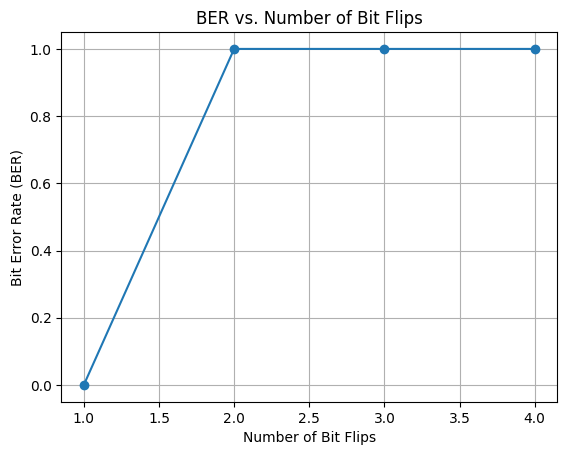

In [215]:
bers = []

for num_bit_flips in [1, 2, 3, 4]:
    _, ber = calculate_ber(H_full, num_messages=1000, num_bit_flips=num_bit_flips)
    bers.append(ber)

# Plot the BER vs. number of bit flips
plt.plot([1, 2, 3, 4], bers, marker='o')
plt.xlabel("Number of Bit Flips")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. Number of Bit Flips")
plt.grid()
    

In [216]:
# Open a verilog file and write the code
def write_verilog_file(filename):
    """
    Write the given code to a Verilog file with the specified filename.
    """
    with open(filename, 'w') as f:
        for i in range(256):
            f.write(f"sine_LUT[{i}] = 12'd{1024 + round(1024 * np.sin(2*np.pi*i/256))};\n")

write_verilog_file('sine_lut.v')

<!-- # 7. **Text Data** -->

In [217]:
# Using ascii encoding to see all printable characters
import string

# Print all printable characters
print(string.printable)

printable_chars = [chr for chr in string.printable]
print(printable_chars)
print(f'Length of printable characters: {len(printable_chars)}')

print(" ".join(printable_chars[0:62]))

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\t', '\n', '\r', '\x0b', '\x0c']
Length of printable characters: 100
0 1 2 3 4 5 6 7 8 9 a b c d e f g h i j k l m n o p q r s t u v w x y z A B C D E F G H I J K L M N O P Q R S T U V W X Y Z


<!-- # 8. **Simulation** -->

In [218]:
def ldpc_decode(y, H, max_iterations=100):
    """
    Decode the received message y using the LDPC code defined by the parity check matrix H.
    """
    # Initialize the variable to store the current estimate of the codeword
    x_hat = y.copy()

    # Perform bit-flipping decoding
    for iteration in range(max_iterations):
        # Forward Pass

        # Calculate the syndrome
        s = np.dot(x_hat, H.T) % 2

        # Check if the syndrome is all zeros
        if np.all(s == 0):
            break

        else:
            
            num_flips = np.zeros(H.shape[1])

            for i in range(len(s)):
                if (s[i] == 1):
                    num_flips = num_flips + H[i, :]
        
            flip_index = np.argmax(num_flips)
            if num_flips[flip_index] > 1:
                x_hat[flip_index] = (1 + x_hat[flip_index]) % 2

    return x_hat[0:27]



In [219]:
num_messages = 1000


mat_path = "D:\Research\BTP\H_mat_9_36_1.mat"

# Load the matrix from the .mat file
H_full = scipy.io.loadmat(mat_path)['H']

# Calculate the generator matrix G
G = generator_matrix(H_full).astype(int)

# Create random messages
messages = np.random.randint(2, size=(num_messages, G.shape[0]))

# Encode the messages
codewords = np.dot(messages, G) % 2

(9, 27) (9, 9)


In [220]:
messages[0,0:27], codewords[0, 0:27]

(array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1], dtype=int32))

<!-- ## 8.1 Number of flips vs Performance -->

In [221]:
errors = []
ber = []

errors_1 = []
ber_1 = []

for num_flips in range(0, 10):

    error_count = 0
    error_bits = 0

    errors_no_decoding = 0
    error_bits_no_decoding = 0

    for i in range(num_messages):
        # Introduce errors in the received message y
        y = codewords[i].copy()
        error_indices = np.random.choice(G.shape[1], size=num_flips, replace=False)
        y[error_indices] = (y[error_indices] + 1) % 2

        # Without decoding
        x_temp = y[0:27]

        if not np.array_equal(messages[i], x_temp):
            errors_no_decoding += 1
        
        error_bits_no_decoding += np.sum(messages[i] != x_temp)

        # Decode the received message y
        x_hat = ldpc_decode(y, H_full)

        # Check if the decoded message is correct
        if not np.array_equal(messages[i], x_hat):
            error_count += 1
        
        error_bits += np.sum(messages[i] != x_hat)
    
    ber.append(error_count / (num_messages*27))
    ber_1.append(errors_no_decoding / (num_messages*27))

    errors.append(error_count/num_messages)
    errors_1.append(errors_no_decoding/num_messages)

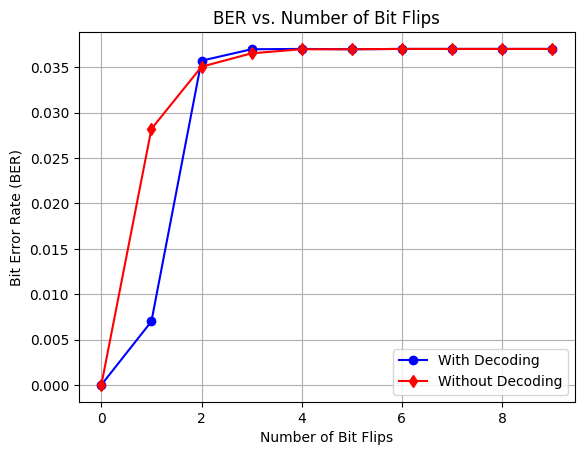

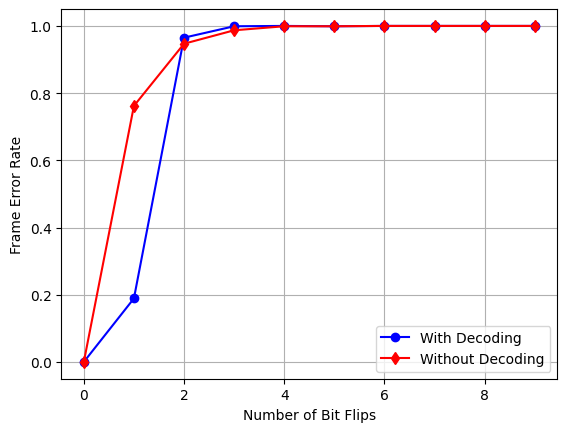

In [222]:
# Plot the BER vs. number of bit flips
plt.plot(range(10), ber, marker='o', color='blue')
plt.plot(range(10), ber_1, marker='d', color='red')

plt.xlabel("Number of Bit Flips")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. Number of Bit Flips")
plt.legend(["With Decoding", "Without Decoding"])
plt.grid()
plt.show()

# Plot the number of errors vs. number of bit flips
plt.plot(range(10), errors, marker='o', color='blue')
plt.plot(range(10), errors_1, marker='d', color='red')


plt.xlabel("Number of Bit Flips")
plt.ylabel("Frame Error Rate")
# plt.title("Number of Errors vs. Number of Bit Flips")
plt.legend(["With Decoding", "Without Decoding"])
plt.grid()
plt.savefig('error_vs_bit_flips.png', dpi=1200, bbox_inches='tight')
plt.show()
# Saviing the plot in the file


<!-- ## 8.2 Probability of flip vs performance -->

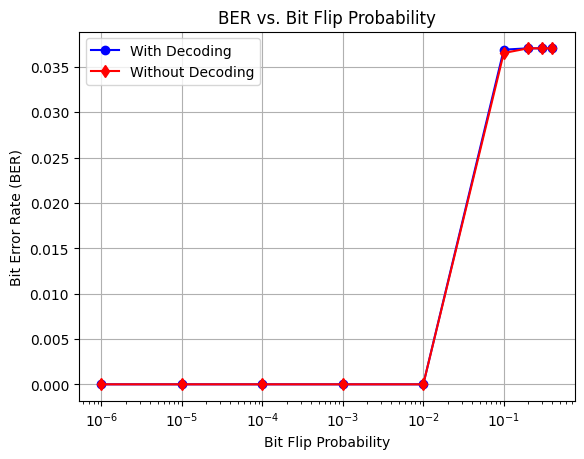

In [223]:
bit_flip_probs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 2e-1, 3e-1, 4e-1]

bers = []
bers_no_decoding = []

for bit_flip_prob in bit_flip_probs:
    error_count = 0
    error_bits = 0

    errors_no_decoding = 0
    error_bits_no_decoding = 0

    for i in range(num_messages):
        # Introduce errors in the received message y
        y = codewords[i].copy()
        error_indices = np.random.choice(G.shape[1], size=int(bit_flip_prob * G.shape[1]), replace=False)
        y[error_indices] = (y[error_indices] + 1) % 2

        # Without decoding
        x_temp = y[0:27]

        if not np.array_equal(messages[i], x_temp):
            errors_no_decoding += 1
        
        error_bits_no_decoding += np.sum(messages[i] != x_temp)

        # Decode the received message y
        x_hat = ldpc_decode(y, H_full)

        # Check if the decoded message is correct
        if not np.array_equal(messages[i], x_hat):
            error_count += 1
        
        error_bits += np.sum(messages[i] != x_hat)
    
    bers.append(error_count / (num_messages*27))
    bers_no_decoding.append(errors_no_decoding / (num_messages*27))

# Plot the BER vs. bit flip probability
plt.plot(bit_flip_probs, bers, marker='o', color='blue')
plt.plot(bit_flip_probs, bers_no_decoding, marker='d', color='red')

plt.xscale('log')
plt.xlabel("Bit Flip Probability")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. Bit Flip Probability")
plt.legend(["With Decoding", "Without Decoding"])
plt.grid()
plt.show()


In [224]:
bit_flip_probs = [1e-3, 1e-2, 1e-1, 2e-1, 3e-1, 4e-1]

ber = []
ber_1 = []

bit_errors = []
bit_errors_1 = []


for bit_flip_prob in bit_flip_probs:
    flipped_codewords = codewords.copy()

    error_count = 0
    error_bits = 0

    error_count_1 = 0
    error_bits_1 = 0

    for i in range(num_messages):
        y = codewords[i].copy()

        for j in range(G.shape[1]):
            if np.random.rand() < bit_flip_prob:
                y[j] = (y[j] + 1) % 2

        # Without decoding
        x_temp = y[0:27]

        if not np.array_equal(messages[i], x_temp):
            error_count_1 += 1


        error_bits_1 += np.sum(messages[i] != x_temp)

        # Decode the received message y
        x_hat = ldpc_decode(y, H_full)

        # Check if the decoded message is correct
        if not np.array_equal(messages[i], x_hat):
            error_count += 1

        error_bits += np.sum(messages[i] != x_hat)

    ber.append(error_count / num_messages)
    ber_1.append(error_count_1 / num_messages)

    bit_errors.append(error_bits)
    bit_errors_1.append(error_bits_1)

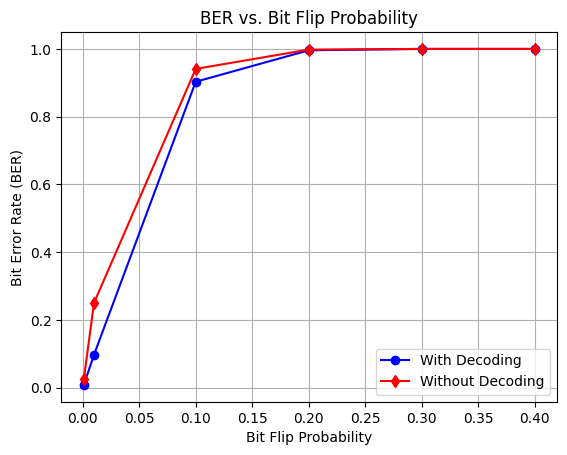

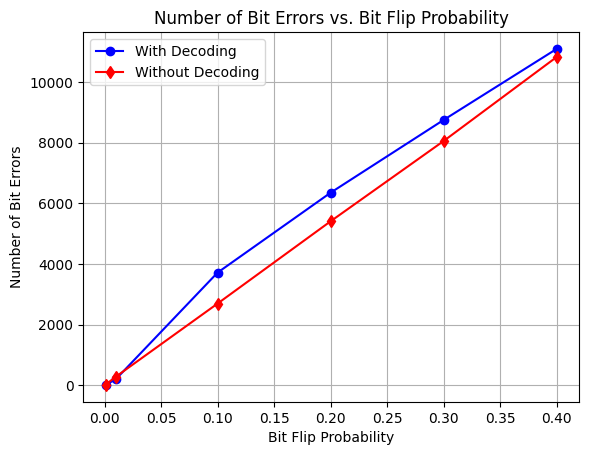

In [225]:
# Plot the BER vs. bit flip probability
plt.plot(bit_flip_probs, ber, marker='o', color='blue')
plt.plot(bit_flip_probs, ber_1, marker='d', color='red')

plt.xlabel("Bit Flip Probability")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. Bit Flip Probability")
plt.legend(["With Decoding", "Without Decoding"])
plt.grid()
plt.show()

# Plot the number of bit errors vs. bit flip probability
plt.plot(bit_flip_probs, bit_errors, marker='o', color='blue')
plt.plot(bit_flip_probs, bit_errors_1, marker='d', color='red')

plt.xlabel("Bit Flip Probability")
plt.ylabel("Number of Bit Errors")
plt.title("Number of Bit Errors vs. Bit Flip Probability")
plt.legend(["With Decoding", "Without Decoding"])
plt.grid()
plt.show()


<!-- ## 8.3 Bit Flip probability vs Number of bit flips -->

In [226]:
def give_factorial(n):
    if n == 0:
        return 1
    else:
        return n * give_factorial(n-1)
        

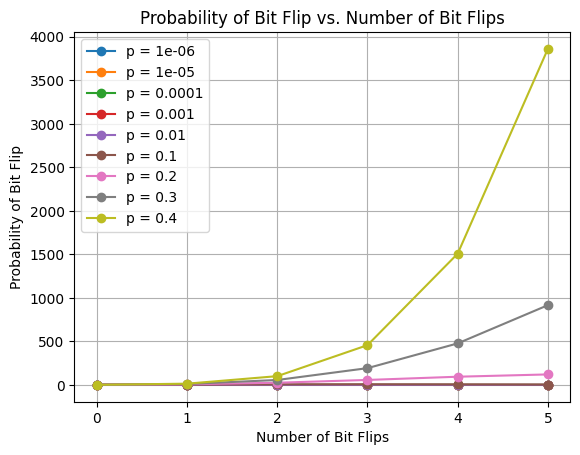

In [227]:
# Ploting the graph for the number of bit flips vs probabibility of bit flip

single_bit_flip_prob = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 2e-1, 3e-1, 4e-1]

for flip_prob in single_bit_flip_prob:

    probs = []

    for num_bit_flips in range(6):
        probs.append(((flip_prob)**num_bit_flips )* give_factorial(36) / (give_factorial(num_bit_flips) * give_factorial(36 - num_bit_flips)))
    
    plt.plot(range(6), probs, marker='o', label=f"p = {flip_prob}")

plt.xlabel("Number of Bit Flips")
plt.ylabel("Probability of Bit Flip")
plt.title("Probability of Bit Flip vs. Number of Bit Flips")
plt.legend()
plt.grid()
plt.show()



    

In [228]:
import pandas as pd

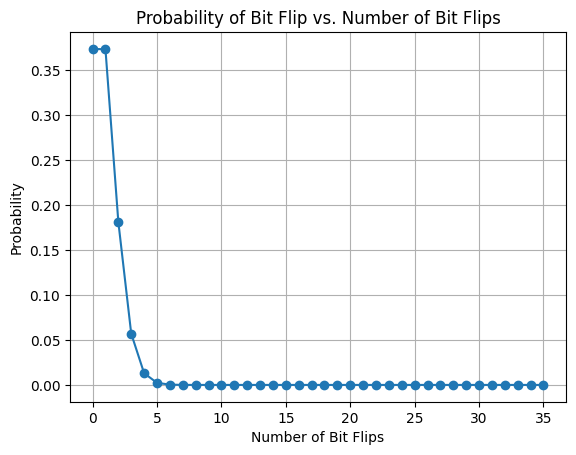

In [229]:
bit_flip_prob = 0.027

total_prob = []
bit_flip = []

for i in range(0, 36):
    total_prob.append((give_factorial(36) / (give_factorial(i) * give_factorial(36 - i)))*(bit_flip_prob**i)*((1-bit_flip_prob)**(36-i)))

    bit_flip.append(i)

plt.plot(bit_flip, total_prob, marker='o')
plt.xlabel("Number of Bit Flips")
plt.ylabel("Probability")
plt.title("Probability of Bit Flip vs. Number of Bit Flips")
plt.grid()
plt.show()

# data = {'Number of Bit Flips': bit_flip, 'Probability': total_prob}

# # Calculating average bit flip
# average_bit_flip = 0
# for i in range(len(bit_flip)):
#     average_bit_flip += bit_flip[i] * total_prob[i]

# print(f"Average Bit Flip: {average_bit_flip}")

# df = pd.DataFrame(data)
# df



<!-- ## 8.3 Performance vs max iteration -->

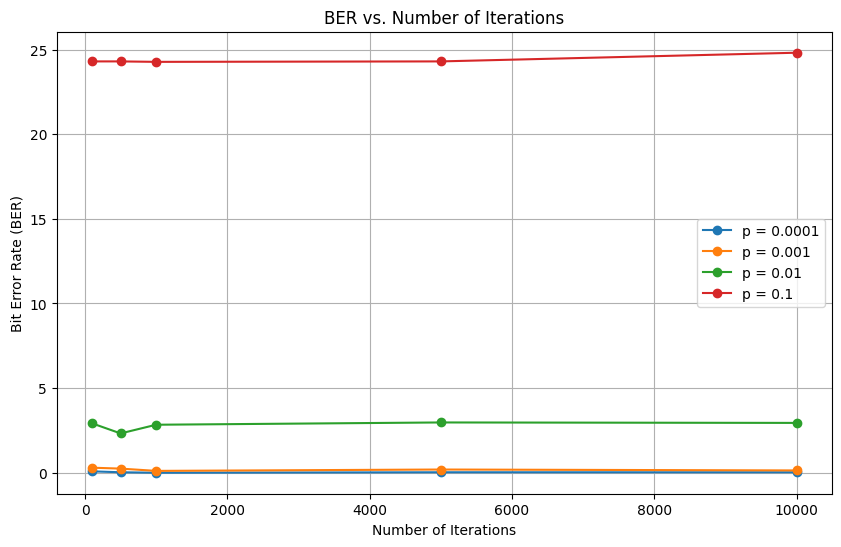

In [230]:
p_values = [1e-4, 1e-3, 1e-2, 1e-1]
max_iterations = [100, 500, 1000, 5000, 10000]

# Make plot such that many line plots at p values in same graph

fig = plt.figure(figsize=(10, 6))


for p in p_values:

    ber = []
    ber_1 = []

    bit_errors = []
    bit_errors_1 = []

    for num_iteration in max_iterations:

        bit_flip_prob = p

        flipped_codewords = codewords.copy()

        error_count = 0
        error_bits = 0

        error_count_1 = 0
        error_bits_1 = 0

        for i in range(num_messages):
            y = codewords[i].copy()

            for j in range(G.shape[1]):
                if np.random.rand() < bit_flip_prob:
                    y[j] = (y[j] + 1) % 2

            # Without decoding
            x_temp = y[0:27]

            if not np.array_equal(messages[i], x_temp):
                error_count_1 += 1

            error_bits_1 += np.sum(messages[i] != x_temp)

            # Decode the received message y
            x_hat = ldpc_decode(y, H_full)

            # Check if the decoded message is correct
            if not np.array_equal(messages[i], x_hat):
                error_count += 1

            error_bits += np.sum(messages[i] != x_hat)

        ber.append(error_count / (num_messages)*(27))
        ber_1.append(error_count_1 / (num_messages)*(27))

        bit_errors.append(error_bits)
        bit_errors_1.append(error_bits_1)

    # Plotting at different p values
    plt.plot(max_iterations, ber, marker='o', label=f"p = {p}")

plt.xlabel("Number of Iterations")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. Number of Iterations")
plt.legend()

plt.grid()
plt.show()




In [231]:
bit_flip_prob = 0.001

# Introduce bit flips
flipped_codewords = codewords.copy()

for i in range(num_messages):
    for j in range(G.shape[1]):
        if np.random.rand() < bit_flip_prob:
            flipped_codewords[i, j] = (flipped_codewords[i, j] + 1) % 2


# Decode the received messages
decoded_messages = np.zeros_like(messages)

for i in range(num_messages):
    decoded_messages[i] = ldpc_decode(flipped_codewords[i], H_full)[0]

# Calculate the bit error rate
ber = np.mean(np.abs(decoded_messages - messages))
print(f"Bit Error Rate (BER): {ber}")


Bit Error Rate (BER): 0.48314814814814816


<!-- ## 8.4 Probability vs number of bit flips -->

<!-- ## 8.5 Hamming Distance -->

In [232]:
# min_hamming_dist = np.inf

# temp_number = 0

# k = G.shape[0]
# n = G.shape[1]
# p = n - k

# # Calculating the minimum hamming distance
# for i in range(0, 2**k, 10):
    
#     # Convert the integer to binary
#     binary_string = bin(i)[2:].zfill(k)

#     # Convert the binary string to a numpy array
#     x = np.array([int(bit) for bit in binary_string])

#     # Encode the message x
#     y = np.dot(x, G) % 2

#     # Calculate the hamming weight of the codeword
#     weight = np.sum(y)

#     # Check if the weight is less than the minimum distance
#     if weight < min_hamming_dist:
#         min_hamming_dist = weight
#         temp_number = i

# print(f"Minimum Hamming Distance: {min_hamming_dist}")
# print(f"Number: {temp_number}")
